# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The aim of this project is to predict the salary of job postings based on previous job posting data.

In [173]:
#import your libraries
import pandas as pd
import sklearn as sk
import seaborn as sns
#etc

__author__ = "Sophia Bouchama"
__email__ = "hello@sophiabouchama.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [120]:
#load the training data into a Pandas dataframe
df_features = pd.read_csv('data/train_features.csv')
df_salaries = pd.read_csv('data/train_salaries.csv')

In [121]:
df_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [122]:
df_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [123]:
print(df_features.shape, df_salaries.shape)

(1000000, 8) (1000000, 2)


### ---- 3 Clean the data ----

In [124]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [125]:
# Check if there are any duplicate Job IDs in the dataframes
df_features['jobId'].nunique()

1000000

In [126]:
df_salaries['jobId'].nunique()

1000000

Job ID is unique in the dataset. Since there are no duplicates, there should be a 1-1 mapping between the two dataframes based on JobID, making it possible to merge and create one dataframe

In [127]:
# Merge the dataframes to create 1 dataframe
df = pd.merge(df_features, df_salaries, on='jobId')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [128]:
# Check the shape to make sure it is the size we expected and no data was lost
df.shape

(1000000, 9)

In [129]:
# Check if there is any missing values in our dataset
df.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
salary                 False
dtype: bool

There is no missing data in the dataset

In [130]:
# Check the type of our features to examine if there are any data inconsistencies
df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

All data types seem consistent

In [108]:
#We can now drop the 'Jobid' columns since ID is only used for unique job identification and provides us with no useful insights or meaningful information.
df.drop(['jobId'], axis=1, inplace=True)
df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [111]:
# Check to see if there is any categorical values in our data set that are unmeaningful or don't make sense
columns = df[['companyId','jobType', 'degree', 'major', 'industry']]
for column in columns:    
    print(column,':\n',df[column].value_counts(),'\n')

companyId :
 COMP39    16193
COMP35    16114
COMP59    16066
COMP30    16041
COMP3     16028
COMP40    16008
COMP44    16005
COMP51    16005
COMP9     15988
COMP56    15979
COMP54    15977
COMP46    15967
COMP58    15961
COMP32    15958
COMP19    15958
COMP18    15957
COMP13    15956
COMP43    15955
COMP21    15949
COMP42    15944
COMP62    15943
COMP25    15932
COMP48    15930
COMP23    15918
COMP4     15918
COMP20    15910
COMP10    15909
COMP14    15908
COMP22    15907
COMP37    15905
          ...  
COMP41    15859
COMP45    15850
COMP6     15837
COMP24    15831
COMP61    15822
COMP1     15820
COMP38    15819
COMP34    15810
COMP33    15801
COMP60    15799
COMP5     15798
COMP47    15796
COMP28    15794
COMP50    15791
COMP12    15783
COMP16    15783
COMP49    15779
COMP53    15776
COMP27    15773
COMP7     15767
COMP55    15767
COMP31    15756
COMP29    15754
COMP26    15750
COMP52    15737
COMP17    15715
COMP0     15666
COMP2     15641
COMP8     15638
COMP57    15635
Name: compa

All values of the features make logical sense

In [135]:
# Check to see if there is any numerical values in our data set that are unmeaningful or don't make sense
# Check minimum and maximum value for each column
columns = df[['yearsExperience','milesFromMetropolis', 'salary']]
for column in columns:    
    print(column,':\n',
          'Minimum value:', df[column].min(), '\n',
          'Maximum value:', df[column].max(), '\n')

yearsExperience :
 Minimum value: 0 
 Maximum value: 24 

milesFromMetropolis :
 Minimum value: 0 
 Maximum value: 99 

salary :
 Minimum value: 0 
 Maximum value: 301 



It doesn't make sense to have a salary of 0, therefore we need to either disregard these values or replace the value with something more representative.

The values of the columns 'yearsExperience' and 'milesfromMetropolis' seem to make logical sense.

In [165]:
len(df.loc[df['salary'] == 0])

0

We can see that there are only 5 rows with salary value of 0. Removing these rows will have a small effect on the dataset since 5 rows is very small compared to the total number of the dataset, therefore I have decided to drop them.

In [166]:
df.drop(df[df.salary == 0].index, inplace=True)
df.shape

(999995, 9)

In our dataframe we can see that we have now have 7 features in total.

Categorical features:
- jobType 
- degree
- major
- industry
- companyId

Numerical features:
- yearsExperience
- milesFromMetropolis
- salary

### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [91]:
# Display the statistical overview of the numerical data
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [169]:
# Display the mean summary of jobs
salary_summary = df.groupby('salary')
salary_summary.mean()

,yearsExperience,milesFromMetropolis
salary,,
17,0.000000,98.000000
18,0.333333,93.333333
19,0.300000,88.800000
20,0.674419,90.906977
21,1.020408,86.224490
22,1.095238,85.174603
23,1.495327,85.766355
24,1.511628,80.511628
25,2.254335,81.757225


In [171]:
salary_summary.std()

,yearsExperience,milesFromMetropolis
salary,,
17,NaN,NaN
18,0.577350,2.309401
19,0.674949,6.795423
20,0.778305,6.398712
21,1.450428,9.925274
22,1.253566,10.250948
23,1.627441,11.893854
24,1.811924,14.943705
25,2.448076,15.668403


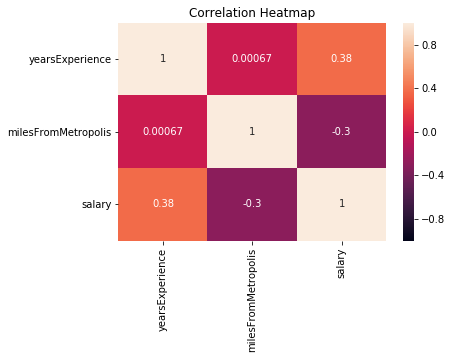

In [179]:
# Create the correlation matrix heatmap. What features correlate the most with salary? What other correlations did you find?
corr = df.corr()
heatmap = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, vmin=-1, vmax=1, annot=True)
# Set the title
heatmap.set_title('Correlation Heatmap');

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data